# Exercise 07: ML Basics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

from numpy.typing import NDArray

## Task 1: Logistic Regression
In this task, we want to implement Logistic Regression with Stochastic Gradient Descent.

__a)__ Implement the `predict_proba` function in the `LogisticRegression` class below. Your function should return the output of a logistic regression classifier according to the current assignments of weights $\mathbf{w}$, i.e.,
$$
expit(\mathbf{w}^T\mathbf{x})
$$
You can assume that model weights are stored in a variable `self.w`.

__b)__ Implement the `predict` function in the `LogisticRegression` class below. The prediction should return class `1` if the classifier output is above 0.5, otherwise `0`

__c)__ Implement the `fit` function to learn the model parameters `w` with stochastic gradient descent. You don't need to add a bias weight/feature. Store the learned parameters in a variable `self.w`. We use epochs as stopping criterion: 1 epoch means iterating over all instances once.

In [2]:
class LogisticRegression():
    '''Logistic Regression Classifier.'''

    def fit(self, x: NDArray[NDArray[float]], y: NDArray[int], eta: float=0.1, epochs: int=10):
        '''
        :param x: 2D numpy array where each row is an instance
        :param y: 1D numpy array with target classes for instances in x
        :param eta: learning rate, default is 0.1
        :param epochs: fixed number of epochs as stopping criterion, default is 10
        '''
        self.w = np.zeros(x.shape[1])
        for epoch in range(epochs):
          for i in range(len(x)):
            x_i = x[i]
            y_i = y[i]
            probability =self.predict_proba(x_i)
            error = y_i - probability
            self.w += eta * error * x_i
        return
    def predict_proba(self, x):
        production = np.dot(self.w, x)
        return expit(production)

    def predict(self, x):
        probability = self.predict_proba(x)
        return 1 if  probability > 0.5 else 0

__d)__ Fit your Logistic Regression classifier to the dataset below. Then plot the data points again, coloring it by the predictions of your classifier. How well can it classify this data set?

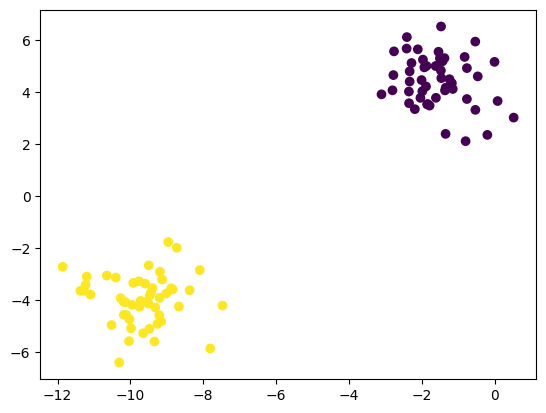

In [3]:
from sklearn.datasets import make_blobs, make_moons

x,y = make_blobs(centers=2,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y);

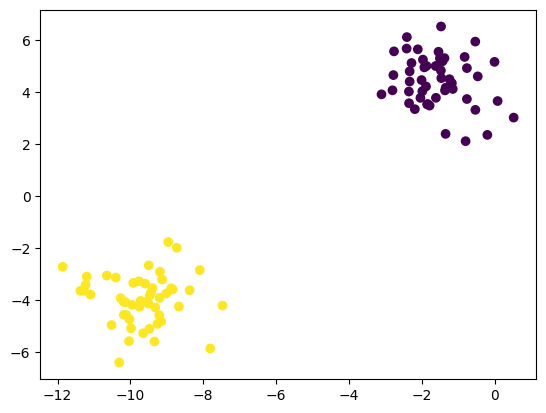

In [7]:
model = LogisticRegression()
model.fit(x, y, eta=0.1, epochs=10)
y_predict = [model.predict(i) for i in x]
plt.scatter(x[:,0],x[:,1],c=y_predict);
plt.show()

__e)__ Again fit your model to the data given below and color the classes by the predictions of your logistic regression classifier. Could we get a better classification by, e.g., tuning the learning rate or training for more epochs?

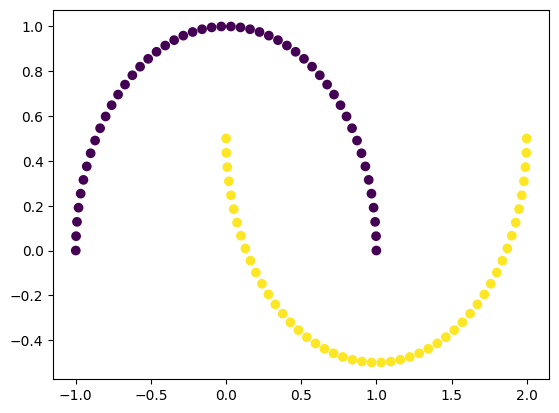

In [8]:
x,y = make_moons(random_state=1)
plt.scatter(x[:,0],x[:,1],c=y);

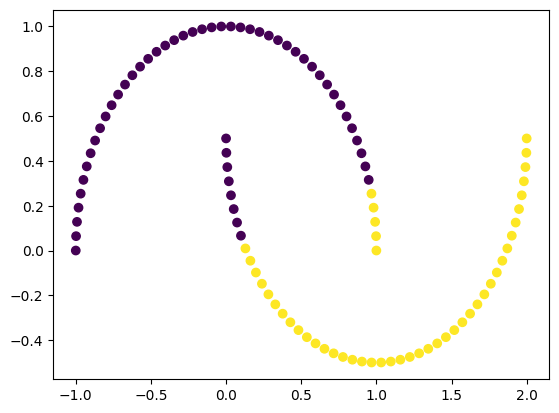

In [9]:
model1 = LogisticRegression()
model1.fit(x,y,eta=0.1, epochs=10)
y_predict1 = [model1.predict(i) for i in x]
plt.scatter(x[:,0],x[:,1],c=y_predict1);